In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
%cd "/content/drive/MyDrive/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Dataset"
!ls

/content/drive/MyDrive/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Dataset
augmented  Fruits


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os #Importar rutas
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


path = "/content/drive/MyDrive/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Dataset"

base_dir = 'Fruits'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 45,
							zoom_range = 0.3,
							horizontal_flip = True,
							brightness_range=[0.7,0.9],
							vertical_flip=True,
							)

Found 313 images belonging to 3 classes.
(6, 150, 150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


<Figure size 640x480 with 0 Axes>

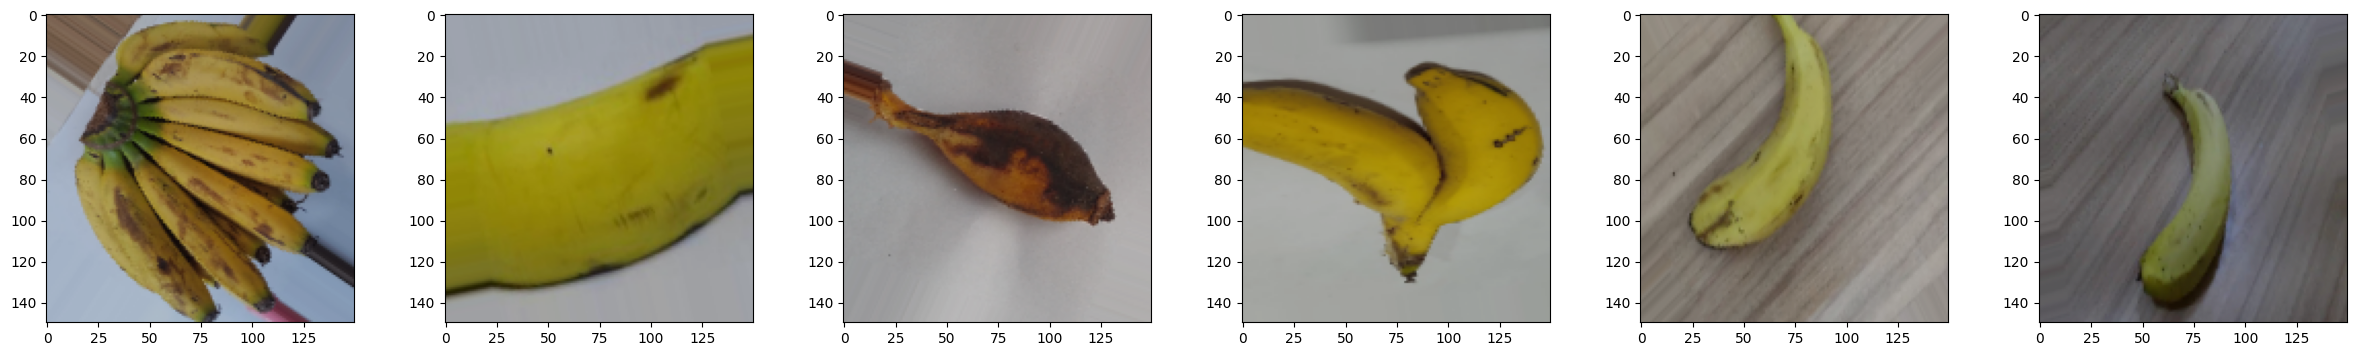

In [20]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 6,
							class_mode ='categorical',
							save_to_dir= path + '/augmented',   
              				save_prefix='aug',
             				save_format='png'
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

#Creacion de la red neuronal

In [21]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
						
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 10)      280       
                                                                 
 flatten (Flatten)           (None, 219040)            0         
                                                                 
 dense (Dense)               (None, 1)                 219041    
                                                                 
Total params: 219,321
Trainable params: 219,321
Non-trainable params: 0
_________________________________________________________________


#Entrenamiento

Epoch 1/40
53/53 [==============================] - 53s 987ms/step - loss: 0.6518 - acc: 0.6550
Epoch 2/40
53/53 [==============================] - 26s 497ms/step - loss: 0.6483 - acc: 0.6635
Epoch 3/40
53/53 [==============================] - 26s 494ms/step - loss: 0.6495 - acc: 0.6667
Epoch 4/40
53/53 [==============================] - 26s 483ms/step - loss: 0.6465 - acc: 0.6645
Epoch 5/40
53/53 [==============================] - 27s 498ms/step - loss: 0.6477 - acc: 0.6656
Epoch 6/40
53/53 [==============================] - 27s 510ms/step - loss: 0.6479 - acc: 0.6656
Epoch 7/40
53/53 [==============================] - 27s 512ms/step - loss: 0.6458 - acc: 0.6656
Epoch 8/40
53/53 [==============================] - 27s 507ms/step - loss: 0.6470 - acc: 0.6624
Epoch 9/40
53/53 [==============================] - 27s 504ms/step - loss: 0.6468 - acc: 0.6603
Epoch 10/40
53/53 [==============================] - 27s 501ms/step - loss: 0.6445 - acc: 0.6667
Epoch 11/40
53/53 [====================

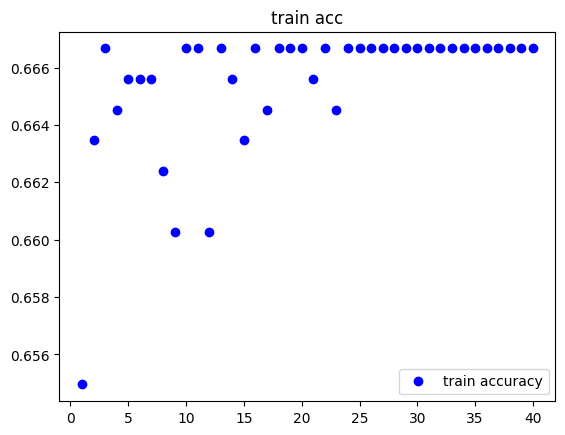

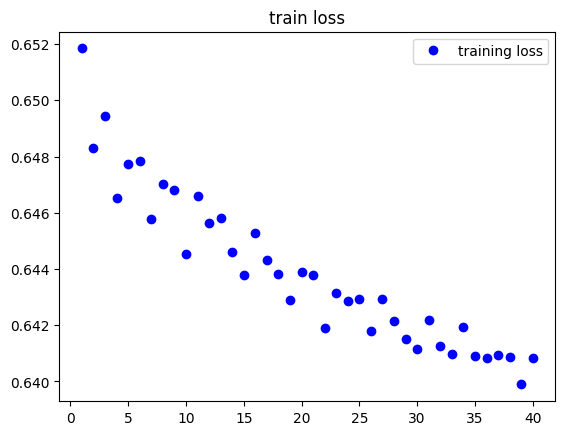

In [22]:
history = model.fit(
	  	train_generator, 
		epochs = 40)
				
			
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [ ]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)

Found 10 images belonging to 2 classes.
 1/25 [>.............................] - ETA: 5s - loss: 89.1613 - acc: 0.6000

25/25 [==============================] - 0s 1ms/step - loss: 89.1613 - acc: 0.6000

test acc :
 0.6000000238418579
